In [67]:
# import labararies 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [68]:
# import csv files
import os
Files=[file for file in os.listdir('./')]
File=[]
for file in Files:
    if file.startswith('Sales_'):
        File.append(file)

In [69]:
# import dataset
df=pd.DataFrame()
for file in File:
    list_file=pd.read_csv("./"+file)
    df=pd.concat([df,list_file])
df.shape

(186850, 6)

In [70]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [72]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df=df[df['Order ID']!='Order ID']

Task 2 : add month column

In [75]:
df['Month']=df['Order Date'].str[:2].astype(int)

In [76]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])

In [77]:
df['Price Each']=df['Price Each'].astype('float')

In [78]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [79]:
df.shape

(185950, 8)

Question 1: what was the best month for sale? and How much was earned that month?

In [115]:
sales1=df.groupby(['Month']).count().sort_values('Sales',ascending=False)

In [114]:
sales1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
12,24984,24984,24984,24984,24984,24984,24984
10,20282,20282,20282,20282,20282,20282,20282
4,18279,18279,18279,18279,18279,18279,18279
11,17573,17573,17573,17573,17573,17573,17573
5,16566,16566,16566,16566,16566,16566,16566
3,15153,15153,15153,15153,15153,15153,15153
7,14293,14293,14293,14293,14293,14293,14293
6,13554,13554,13554,13554,13554,13554,13554
2,11975,11975,11975,11975,11975,11975,11975


<Axes: xlabel='Month', ylabel='Sales'>

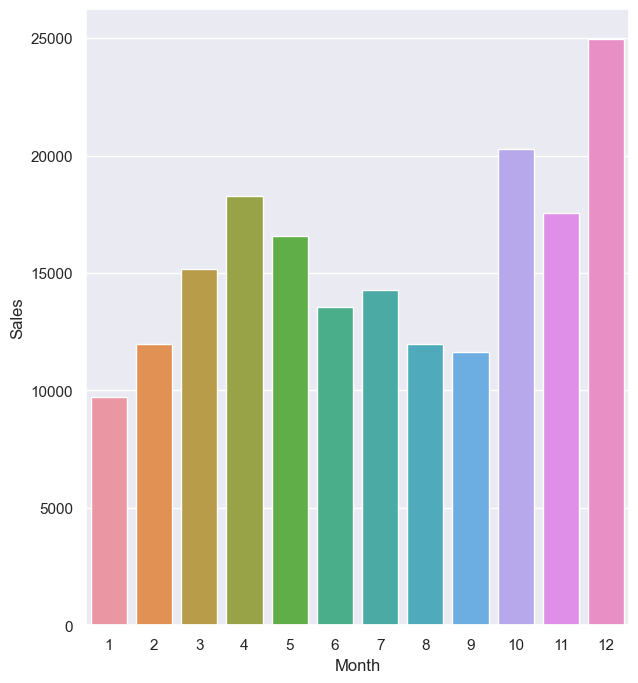

In [112]:
#1 best month for sale 

sns.barplot(x=sales1.index,y=sales1["Sales"],data=sales1)


In [116]:
# best month earning
sale2=df.groupby(['Month']).sum().sort_values('Sales',ascending=False)

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\414950065.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale2=df.groupby(['Month']).sum().sort_values('Sales',ascending=False)


In [119]:
sale2

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


<Axes: xlabel='Month', ylabel='Sales'>

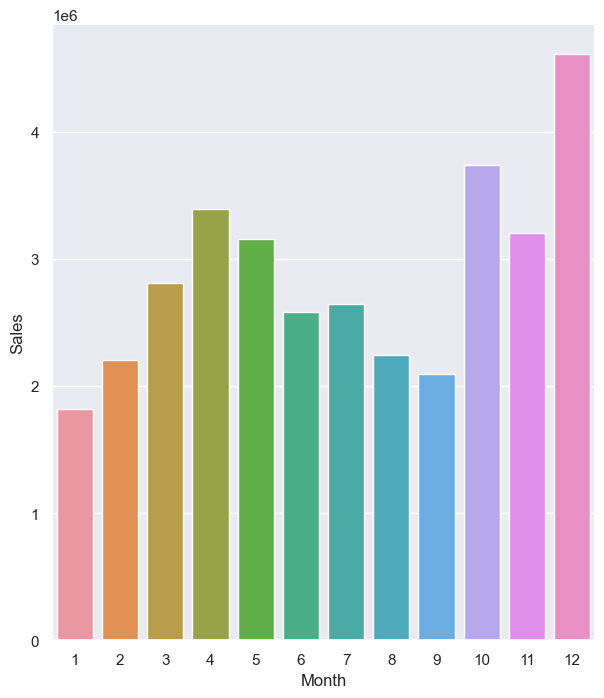

In [109]:
sns.barplot(x=sale2.index,y='Sales',data=sale2)

from above graphs we can conclude that the best month for sale is dec and earning of that month is 4613443.34

Question 2 : which city had highest number of sales

In [123]:
def getdata(address):
    return address.split(',')[1]
def getdata2(address):
    return address.split(',')[2].split(' ')[1]
df['City']=df['Purchase Address'].apply(lambda x:getdata(x)+' ('+getdata2(x)+')')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [127]:
df.groupby(['City']).sum().sort_values('Sales',ascending=False)

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\1005927959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['City']).sum().sort_values('Sales',ascending=False)


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


In [128]:
cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False)

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\1366425714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities=df.groupby(['City']).sum().sort_values('Sales',ascending=False)


<Axes: xlabel='City', ylabel='Sales'>

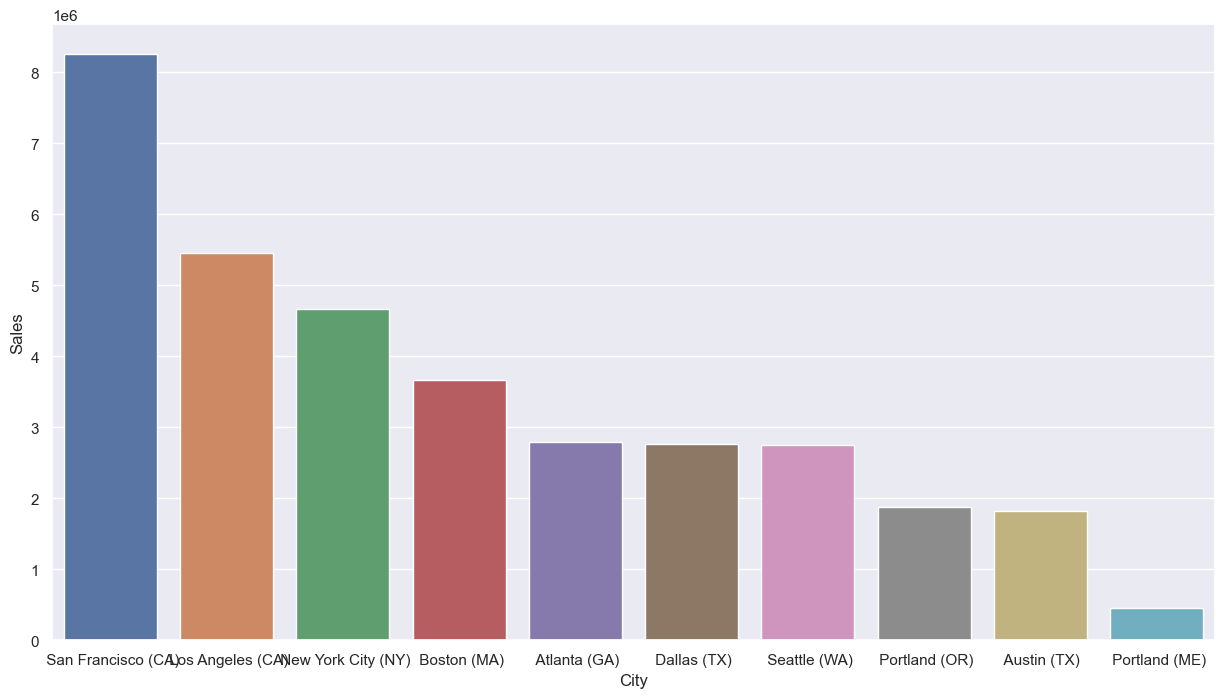

In [132]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=cities.index,y='Sales',data=cities)

San francisco had most of sales

Questions 3: What time should we display advertisement to maximize likelyhood of customer's buying product?

In [135]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [136]:
df['Hour']=df['Order Date'].dt.hour

In [137]:
df['Minute']=df['Order Date'].dt.minute

In [138]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


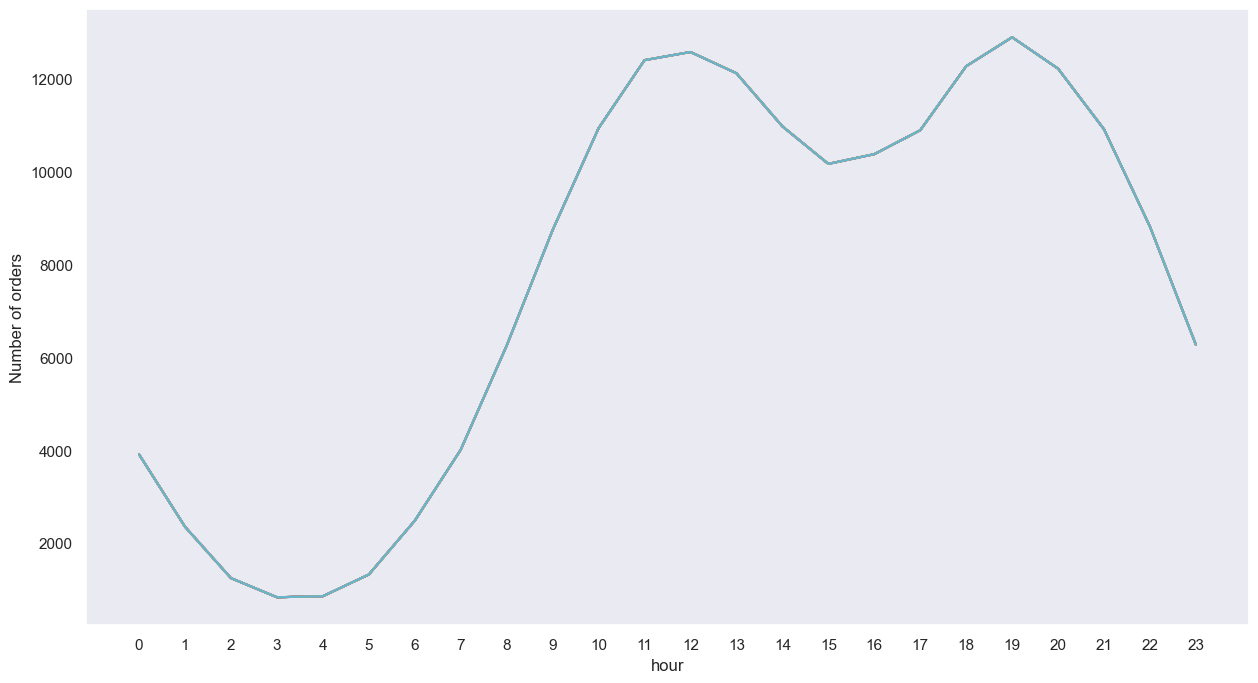

In [148]:
hourse=[hour for hour ,a in df.groupby('Hour') ]
plt.plot(hourse,df.groupby(['Hour']).count())
plt.xticks(hourse)
plt.xlabel('hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

Question 4: Which product are most often sold together?

In [164]:
dup=df[df['Order ID'].duplicated(keep=False)]

In [168]:
dup['Grouped']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\898725253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Grouped']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [169]:
dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [170]:
dup=dup[['Order ID','Grouped']].drop_duplicates()
dup.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [178]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in dup['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


question 5: what product sold the most?why do you think it sold the most

In [179]:
product_group=df.groupby('Product')
quantity_ored=product_group.sum()['Quantity Ordered']

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\1261898805.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ored=product_group.sum()['Quantity Ordered']


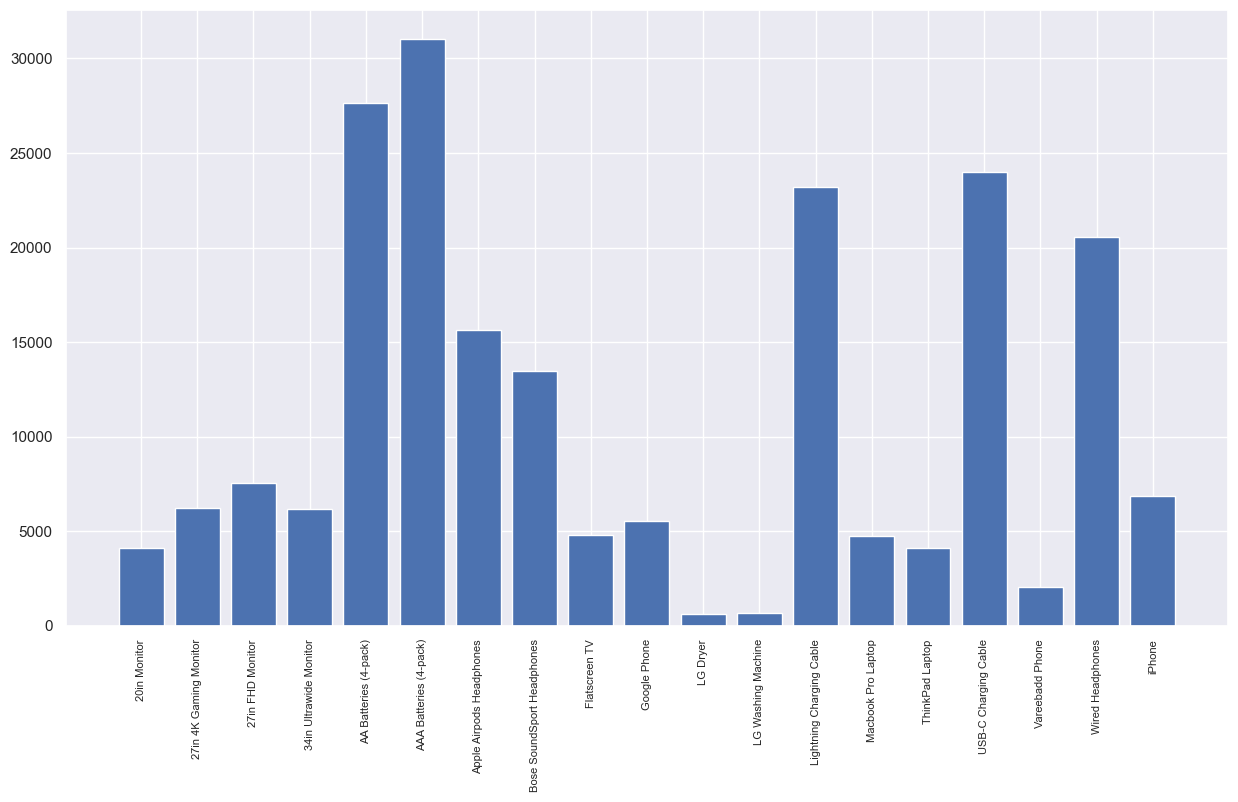

In [183]:
product=[product for product,df in product_group]
plt.bar(product,quantity_ored)
plt.xticks(product,rotation='vertical',size=8)
plt.show()

C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\2355391233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices=df.groupby('Product').mean()['Price Each']
C:\Users\ceotu\AppData\Local\Temp\ipykernel_19840\2355391233.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical',size=8)


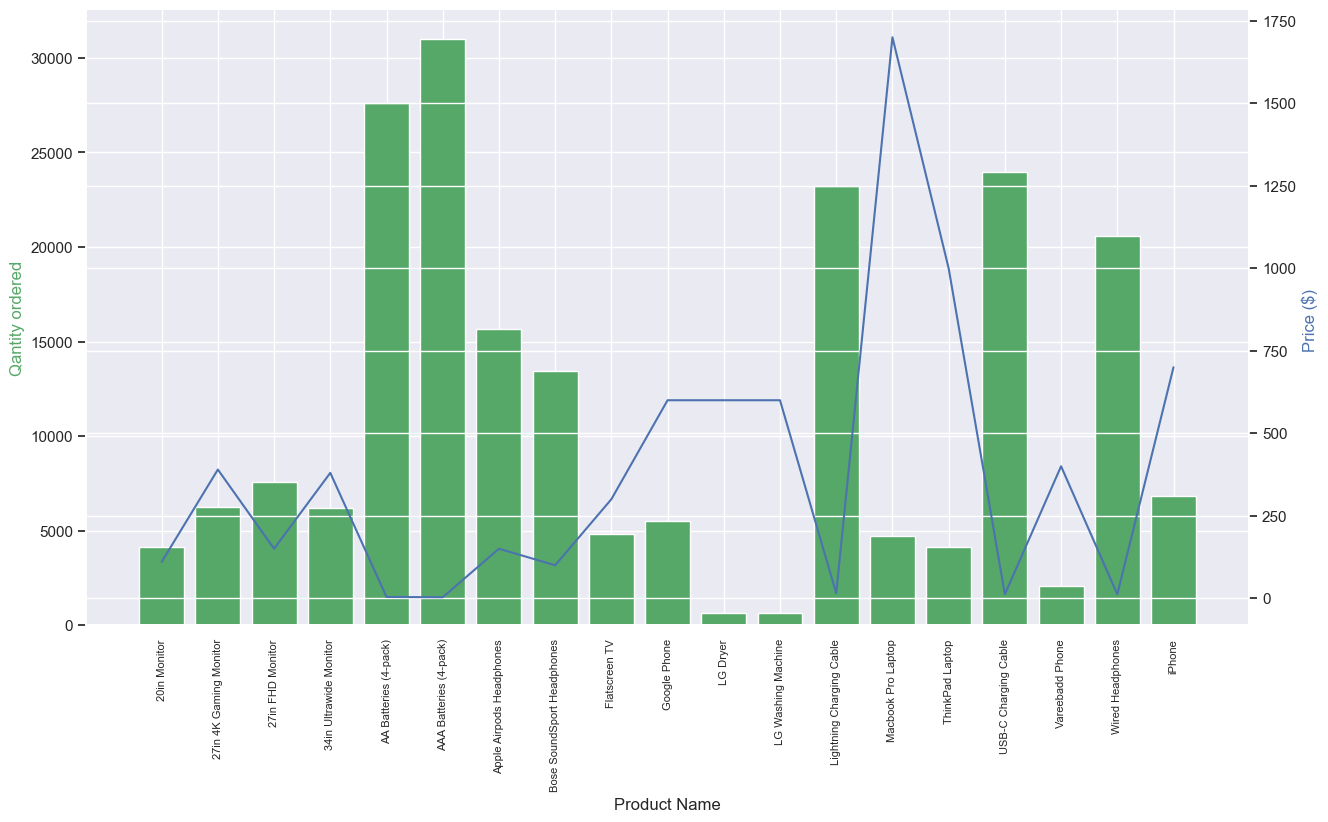

In [188]:
prices=df.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(product,quantity_ored,color='g')
ax2.plot(product,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Qantity ordered',color='g')
ax2.set_ylabel('Price ($) ',color='b')
ax1.set_xticklabels(product,rotation='vertical',size=8)

plt.show()